     Med_1_mL  Med_2_mL  Virus Present
0    6.508231  8.582531              0
1    4.126116  3.073459              1
2    6.427870  6.369758              0
3    3.672953  4.905215              1
4    1.580321  2.440562              1
..        ...       ...            ...
395  2.884122  3.271748              1
396  7.290855  9.488672              0
397  7.895325  8.272529              0
398  2.690592  2.674979              1
399  7.587821  9.473968              0

[400 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB
None
----------------------------------------------------------------------------------------------------
Med_1_mL
6.508231    1
4.194

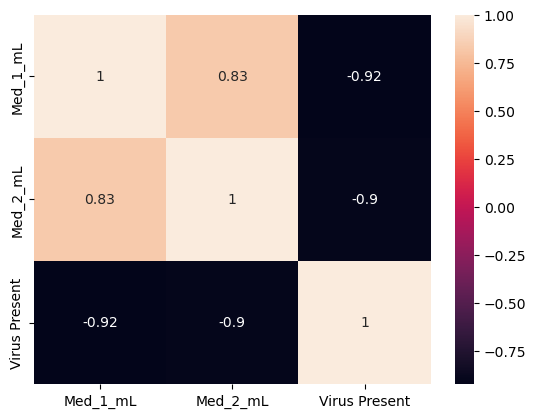

----------------------------------------------------------------------------------------------------


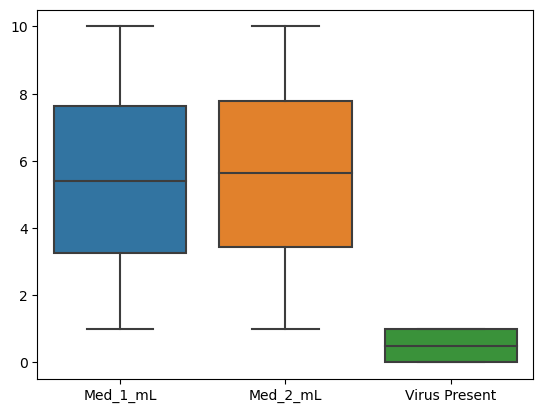

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Step-1 : Business Problem Understanding 
          # The dataset is about the medical study of mice(mouses) infected with a virus. To get recover from that virus the scientist 
          # gives the various combinations of doses of two medicines and then they checked mouses are still infected or not.
    
# Here, by observing past data(given two dosage measurements), we have to make a classification madel to predict that the mouse is still having infected or not...

# Step-2 : Data Understanding 

df = pd.read_csv("mouse_viral_study.csv")
print(df)

print(df.info())
print("-"*100)

print(df["Med_1_mL"].value_counts())
print(df["Med_2_mL"].value_counts())
print(df["Virus Present"].value_counts())
print("-"*100)

print(df["Med_1_mL"].unique())
print(df["Med_2_mL"].unique())
print(df["Virus Present"].unique())
print("-"*100)

print(df.describe())
print("-"*100)

print(df.corr())
print("-"*100)

sns.heatmap(df.corr(),annot=True)
plt.show()
print("-"*100)

sns.boxplot(df)
plt.show()

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

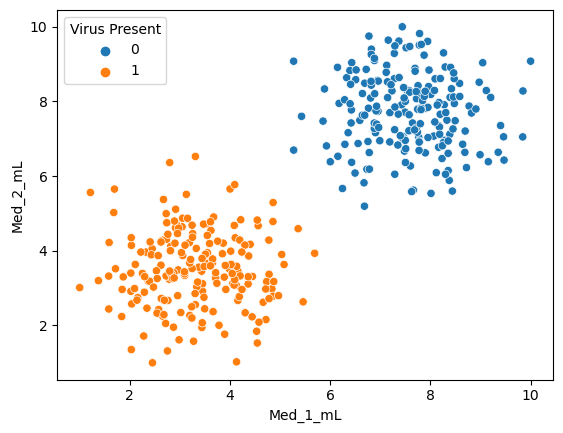

In [2]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",data=df,hue = "Virus Present")

In [3]:
# Step-3 : Data Preprocessing

# Data Cleaning : 

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())
print("-"*100)


# Data Wrandling : 

# In this dataset two input columns are continous variables and one output column is discrete categorical which is already converted into discrete count, 
# So there no need of converting them into discrete numeriacal, So no need of Data Wrangling.



Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------


In [4]:
# Step-4 : Split the dataset into two parts train data & test data

X = df[["Med_1_mL","Med_2_mL"]]
print(X)
print("-"*100)

y = df["Virus Present"]
print(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)



     Med_1_mL  Med_2_mL
0    6.508231  8.582531
1    4.126116  3.073459
2    6.427870  6.369758
3    3.672953  4.905215
4    1.580321  2.440562
..        ...       ...
395  2.884122  3.271748
396  7.290855  9.488672
397  7.895325  8.272529
398  2.690592  2.674979
399  7.587821  9.473968

[400 rows x 2 columns]
----------------------------------------------------------------------------------------------------
0      0
1      1
2      0
3      1
4      1
      ..
395    1
396    0
397    0
398    1
399    0
Name: Virus Present, Length: 400, dtype: int64


In [5]:
# Modelling : With Default value of kernel & c-value

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)



SVC()

In [6]:
# Step-4 : Prediction 

ypred_train = model.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

ypred_test = model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)

# Evaluation : evaluation using deafult SVM model with default Kernel & c-value

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,ypred_train)
print("train_accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,ypred_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print("cross_val_score:",scores.mean())

ypred_train: [0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1]
----------------------------------------------------------------------------------------------------
ypred_test: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 0 1]
------------------------------------------------------------

In [7]:
# Step-6 : Final Model Selection

# for best model of SVM we have to findout the best Kernel & c-value first, 
# So, by using HyperParameter Tuning we can find best value of Kernel & c-value.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator = SVC()

grid_param = {"kernel":["linear","rbf","sigmoid","ploy"],"C":[0,0.001,0.01,0.1,1,10]}       # Here, Kernel is key of dictionary(dict) having value as the list of kernels i.e.["linear","rbf","sigmoid","ploy"]
                                                               # Here, c is also key of dictionary(dict) having value as the list of [0,0.001,0.01,0.1,1,10,100]

# Identifying the best value of the paramter(Kernel & c-value) within the given list for the given data

svm_classifier= GridSearchCV(estimator,grid_param,cv=5,scoring="accuracy")   # ---> Here, svm_classifier will collect the best Kernel & c-value 
svm_classifier.fit(X_train,y_train)
svm_classifier.best_params_                 # ---> It will give the best Kernel & c-value value for best model identification

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\skle

{'C': 0.001, 'kernel': 'linear'}

In [8]:
# Step-7: Final Model Selection 

# Modelling : With best identified values of kernel & c-value by Hyperparameter Tuning

from sklearn.svm import SVC
final_model = SVC(kernel="linear",C=0.001)
final_model.fit(X_train,y_train)

SVC(C=0.001, kernel='linear')

In [10]:
# Prediction
ypred_train = model.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

ypred_test = model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)

# Evaluation : evaluation with best value of Kernel & c-value identified by using HyperParameter Tuning. 


from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,ypred_train)
print("train_accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,ypred_test)
print("test_accuracy:",test_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model,X,y,cv=5)
print("cross_val_score:",scores.mean())

ypred_train: [0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1]
----------------------------------------------------------------------------------------------------
ypred_test: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 0 1]
------------------------------------------------------------